In [ ]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('/content/diabetes.csv')
    print("DataFrame successfully loaded!")
except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found.")
    df = None

# Display the first few rows of the DataFrame and its information
if df is not None:
    print("\nDataFrame:")
    print(df)
    print("\nDataFrame info:")
    print(df.info())

DataFrame successfully loaded!

DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                     

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Visualize the decision tree using Graphviz
dot_data = export_graphviz(dtree,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=['Non-Diabetic', 'Diabetic'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", view=False, format='png')

# print a message to the user to let them know the tree has been generated
print("Decision tree visualization has been generated as decision_tree.png")

Decision tree visualization has been generated as decision_tree.png


Decision tree visualization has been saved to 'decision_tree_plot.png'.


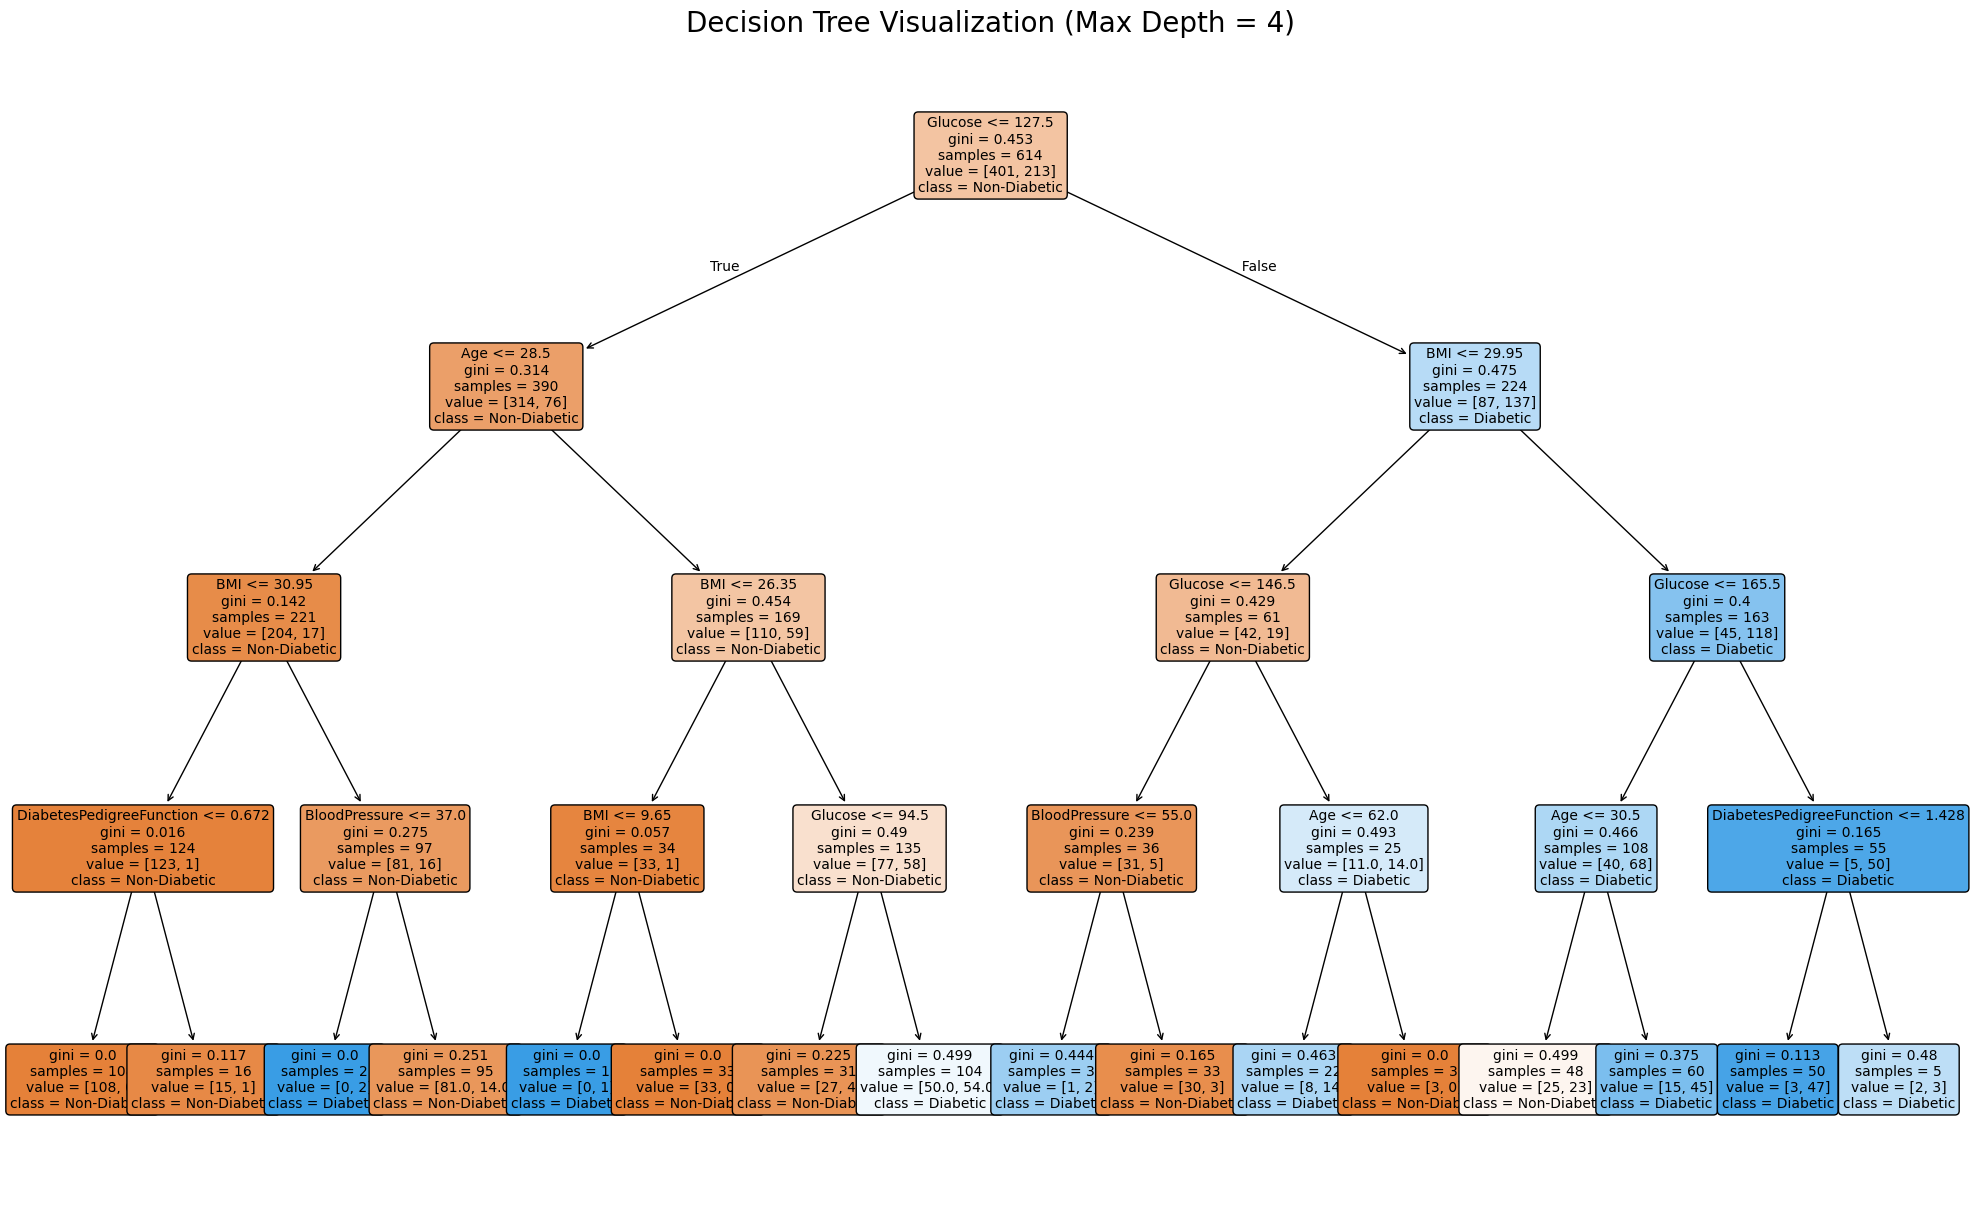

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the dataset
try:
    df = pd.read_csv('diabetes.csv')
except FileNotFoundError:
    print("Error: The file 'diabetes.csv' was not found.")
    exit()

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier with a max_depth for better visualization
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

# --- Plot Decision Tree using sklearn's plot_tree ---
plt.figure(figsize=(25,15))
plot_tree(dtree,
          feature_names=X.columns,
          class_names=['Non-Diabetic', 'Diabetic'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (Max Depth = 4)", fontsize=20)
plt.savefig('decision_tree_plot.png')
print("Decision tree visualization has been saved to 'decision_tree_plot.png'.")